# Practical Work 1 - ML
###### Adriel dos Santos Araújo - M048.216.001



Neste trabalho foram implementados dois métodos de classificação, __K Nearest Neighbors (KNN) e Naive Bayes (NB)__, ambos sem o uso de bibliotecas externas para fazer o processamanento das etapas de aprendizado e teste dos algorítimos.

Para entendermos melhor a implementação é necessário, antes de mais nada, compreender o princípio básico destes algorítmos. O __KNN__, em síntese, é um algorítmo que utiliza uma métrica de distância qualquer (Por exemplo, Euclidiana,  Manhattan, ou outras) para identificar os vizinhos mais próximos de uma amostra, e assim, determinar a sua classe. Já o __Naive Bayes__ é um algorítmo de classificação probalistico baseado no teorema de Bayes que gera uma matriz de probabilidadeds para identificar as classes mais provaveis de uma amostra.

Diante destes conceitos vamos colocar a mão na massa? Este trabalho esta dividido em 6 Seções:
1. Preparação do dataset
2. Implementação do KNN
    3. Testes básicos com o KNN
3. Implementação do NB
    3. Testes Básicos com o NB
4. Gerando novas versõe dos modelos
5. Testando com diferentes conjuntos de treinos/teste




## 1. Preparação do Dataset

Primeiramente vamos importar as bibliotecas que utilizaremos ao decorrer da implementação. Vale mencionar que os métodos utilizados do Sklearn são essencialmente metodos para carregar e transformar o dataset e medidas para avaliarmos o desempenho dos algorítmos implementados.

In [149]:
%matplotlib inline

import math
import seaborn
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc



Feito isso, carregamos o dataset e dividimos-o em 4 partes:
1. X_train: Contendo as instaâncias de X para treino;
2. y_train: Contendo os Ys de cada X de treino;
3. X_test: Com as instâncias de X para utilizamos no teste;
4. y_test: Com os Ys de X_test.

Para realizar essa divisão usamos o método __train_test_split do sklearn__

In [150]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size = 0.30)


A função __info_dataset__ imprime o tamanho de cada parte do dataset.

In [151]:
def info_dataset():
    print("Tamanho do dataset: ", len(iris_data['data']),
          "\nX Treino:", len(X_train), 
          "\ty Treino:", len(y_train), 
          "\nX Teste:", len(X_test), 
          "\ty Teste:", len(y_test))

info_dataset()

Tamanho do dataset:  150 
X Treino: 105 	y Treino: 105 
X Teste: 45 	y Teste: 45


## 2. Implementação do KNN 

Como comentado anteriormente, o KNN considera uma medida de distância para determinar a classe de uma amostra. Aqui utilizamos a  distância euclidiana. 

O método construtor **__** **init** **__** inicializa os atributos que irão armezanar os conjuntos de treino e teste e a quantidade de vizinhos a ser considerada na predição.

Como para cada nova instância recebida, na etapa de predição, é calculada a sua distancia em relação a todo o conjunto de treino, o método **learn** apenas deixa os conjuntos de treino **(X e y)** disponíveis globalmente *dentro da classe* para que outros métodos possam acessá-los

Antes de mais nada, para evitar a chamada do método de predição sem a passagem prévia do conjunto de treino, uma mensagem é exibida ao usuário se os atributos de treino estiverem vazios *(None)*



In [152]:
class Adriel_KnnClassifier():
    
    def __init__(self, K = 3):
        self.X_train, self.y_train = None, None
        self.K = K

    def learn(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self,X):

        if self.X_train is None:
            print("Please, first call the learning method")
            return []

        
        dists = {}
        predicts = []

        # Para cada instância do X(teste) sua distância é calculada em relação a todo o conjunto de treino.
        # As distâncias são armazenadas no dicionário dists. Na sequência são armezenadas os índices dos K vizinhos
        for instancia in X:
            for i in range(len(self.X_train)):
                dists[i] = distance.euclidean(instancia,self.X_train[i])
            k_vizinhos = sorted(dists, key=dists.get)[:self.K]
            

            # Para cada índice de vizinho, verifica a qual classe ele pertence (0, 1 ou 2).
            # A lista rótulos é incrementada de acordo com o valor da classe,
            # Cada posição da lista indica, respectivamente uma classe.
            rotulos = [0,0,0]
            for indice in k_vizinhos:
                if self.y_train[indice] == 0:
                    rotulos[0] += 1
                elif self.y_train[indice] == 1:
                    rotulos[1] += 1
                else:
                    rotulos[2] +=1

            # A posição com maior valor indica a classe apontada pelo KNN
            voto = rotulos.index(max(rotulos))
            predicts.append(voto)

        return predicts

Didaticamente foi implementada uma função para impressão em gráfico da matriz de confusão

In [153]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print('Confusion matrix')
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


### 2A. Testes básicos com o KNN

Uma vez com a classe implementada testá-la. A classe é instanciada e o conjunto de treino passado para o método de aprendizado. O método predict retorna as intancias preditas que são usadas para comparar com as classes reais e obter uma medida de desempenho, neste caso a **acurácia**. Além disso, a matrix de confusão resultante da classificação é impressa.


Acc:  95.5555555556 %
Confusion matrix
[[17  0  0]
 [ 0 10  2]
 [ 0  0 16]]


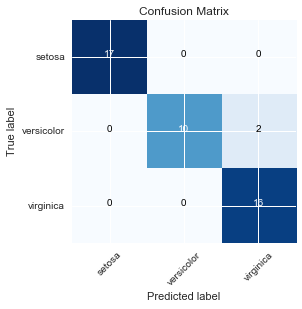

In [154]:
Knn = Adriel_KnnClassifier(K = 5)
Knn.learn(X_train,y_train)
pred_knn = Knn.predict(X_test)
desempenho_knn = accuracy_score(y_test, pred_knn)*100
print("Acc: ", desempenho_knn, "%")


plot_confusion_matrix(confusion_matrix(y_test, pred_knn),iris_data.target_names)

Vimos que a implementação esta correta e os resultados são satisfatórios. Agora vamos para a implementação do segundo método para, posteriormente, realizamos comparações entre ambos.

## 3. Implementação do Naive Bayes

Sabemos que o Naive Bayes é um modelo probalístico de classificação. Sendo assim, uma serie de medidas são extraidas dos conjuntos de treino e teste para determinarmos a classe de uma nova instancia.

O método de aprendizado **(learn)** faz essencialmente duas tarefas. A primeira delas é o agrupamento das instancias de treino por classes em um dicionário. Cada chave desse dicionário é a classe relativa à todas instancias com esta classe. Se imprimíssimos o dicionario *feat_by_classes* veriamos algo como:

0: [[3.5,  4.5,  0.6,  5.5],
    [5.5,  4.4,  0.2,  4.4],
    ...
    [6.5,  8.5,  3.6,  7.1]],

1: [[8.7,  4.1,  1.6,  4.6],
    [3.6,  5.2,  4.7,  4.3],
    ...
    [5.7,  1.3,  3.4,  2.2]],

2: [[5.4,  7.7,  8.6,  1.3],
    [9.3,  4.3,  3.4,  3.7],
    ...
    [6.4,  7.3,  1.2,  9.1]]
    
    
De posse deste dicionário, calculamos agora duas medidas: a média e o desvio padrão. Essas medidas são cálculadas verticalmente, ou seja, uma média  e um desvio padrão para o atributo 1 considerando todas a instancias *Xi* da classe *Yi*. O mesmo para os outros atributos. Sendo assim, como nosso dataset tem 4 atributos, teremos então 4 conjuntos de médias e desvio padrão para cada classe do nosso dataset, logo 12 medidas. Se imprimíssemos o dicionario *mean_std_by_classes* teriamos algo semelhante à:

0: [(media1, desvio_padrão1),
(media2, desvio_padrão2),
(media3, desvio_padrão3),
(media4, desvio_padrão4)],

1: [(media1, desvio_padrão1),
(media2, desvio_padrão2),
(media3, desvio_padrão3),
(media4, desvio_padrão4)],

2: [(media1, desvio_padrão1),
(media2, desvio_padrão2),
(media3, desvio_padrão3),
(media4, desvio_padrão4)]

A etapa de predição **(predict)** usa este dicionário de medidas para calcular a probabilidade de cada nova instância recebida. O cálculo de probabilidade **(get_probabilities)** é baseado no teorema de Bayes. Os valores de médias e desvio padrões são utilizados em operações com a instancia (xi teste) para determinar uma lista de probabilidades de Xi(teste) com cada classe Y. A classe com maior probabilidade é apontada pelo método de predição do algorítmo como a classe da instancia Xi(teste) recebida.

In [155]:
class Adriel_NBClassifier():
    def __init__(self, params=None):
        self.mean_std_by_classes = {}

    def learn(self, X, y):
        feat_by_classes = {}

        # Gera um dicionario com todas as ocorrencias para cada classe >> d = {yi: [[x1],[x2], [x3], ..., [xn]]}
        for xi, yi in zip(X,y):
            if yi not in feat_by_classes:  feat_by_classes[yi] = []
            feat_by_classes[yi].append(xi)

        # Gera um dicionario contendo os valores de média e desvio padrão para cada conjunto de classee|atributo de X
        #  d = {yi: [(mean_at1, std_at1), (mean_at2, std_at2), ... , (mean_atn, std_atn)]}
        for yi, xi in feat_by_classes.items():
            self.mean_std_by_classes[yi] = [(np.mean(attribute_list), np.std(attribute_list)) for attribute_list in zip(*xi)]

    def predict(self,X):
        predictions = []

        # para cada entrada de teste, manda predizer junto com o dicionario d
        for xi in X:
            # calcula a probabilidade de cada Xi_teste considerando os dados de medias e desvio padrão por classes de X_treino
            probabilities = self.get_probabilities(xi)

            # busca a classe com maior probabilidade
            class_max_prob = max(probabilities, key=probabilities.get)
            predictions.append(class_max_prob)


        return predictions

    def get_probabilities(self, xi):
        probabilities = {}

        for yi, att_x_treino in self.mean_std_by_classes.items():
            probabilities[yi] = 1

            # para cada conjnto de std e media por classe (de X_treino), pega os valores e calcula a probabilidade junto ao X_teste[i]
            for i in range(len(att_x_treino)):
                mean, std = att_x_treino[i]
                value_xi = xi[i]

                exp_xi_mean = math.pow(value_xi - mean, 2)
                exp_std = 2* (math.pow(std, 2))
                exponent = math.exp(-(exp_xi_mean/ exp_std))

                result = (1 / (math.sqrt(2 * math.pi) * std)) * exponent

                probabilities[yi] *= result

        return probabilities


### 3A. Testes básicos com o Naive Bayes

Assim como com o KNN, uma vez com a classe implementada testá-la. A classe é instanciada e o conjunto de treino passado para o método de aprendizado. O método predict retorna as intancias preditas que são usadas para comparar com as classes reais e obter uma medida de desempenho, neste caso a **acurácia**. Além disso, a matrix de confusão resultante da classificação é impressa.


Acc:  95.5555555556 %
Confusion matrix
[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]


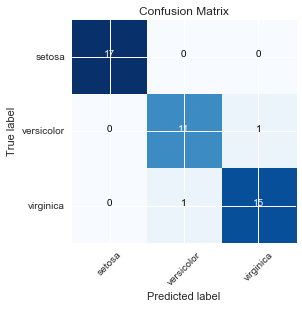

In [156]:
Nb = Adriel_NBClassifier()
Nb.learn(X_train, y_train)
pred_nb = Nb.predict(X_test)
desempenho_nb = accuracy_score(y_test, pred_nb) * 100
print("Acc: ", desempenho_nb, "%")
plot_confusion_matrix(confusion_matrix(y_test, pred_nb),iris_data.target_names)


## 4. Gerando novas vesões dos modelos

Podemos variar a quantidade de vizinhos a ser considerada pelo algorítmo KNN e análisarmos os resultados. Consideramos um conjunto de 6 vizinhos, variando a partir de 3. 

In [164]:
K = [3,5,7,9,11,13]
acc_knn = []

for k in K:
    Knn = Adriel_KnnClassifier(K = k)
    Knn.learn(X_train,y_train)
    pred_knn = Knn.predict(X_test)
    desempenho_knn = accuracy_score(y_test, pred_knn)*100
    acc_knn.append(desempenho_knn)
    print("K", k, " - Acc:", desempenho_knn, "%")
#     plot_confusion_matrix(confusion_matrix(y_test, pred_knn),iris_data.target_names)

K 3  - Acc: 97.7777777778 %
K 5  - Acc: 97.7777777778 %
K 7  - Acc: 97.7777777778 %
K 9  - Acc: 95.5555555556 %
K 11  - Acc: 95.5555555556 %
K 13  - Acc: 95.5555555556 %


Podemos usar o Pandas para tabular o resultado e exibí-los mais organizadamente, simplismente criando um dicionário com o que queremos exibir e passa-lo para o método DataFrame

In [168]:
saidas_knn = pd.DataFrame({'ACC': acc_knn, 'K': K})
saidas_knn
    

ACC   K
0  97.777778   3
1  97.777778   5
2  97.777778   7
3  95.555556   9
4  95.555556  11
5  95.555556  13

Podemos ainda usar a acurácia e mostrá-la graficamente com o Violinplot um método da biblioteca seaborn que nos permite analisar conjuntamente a variação juntamente com a sua média e desvio padrão

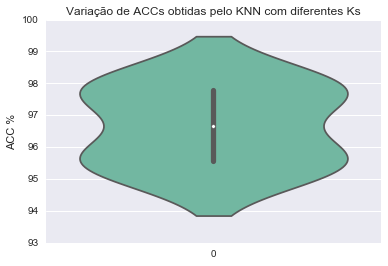

In [174]:
fig = plt.figure()
seaborn.violinplot(data=acc_knn, palette='Set2', split = False)
plt.ylabel('ACC %')
plt.title("Variação de ACCs obtidas pelo KNN com diferentes Ks")
plt.show()


A nossa implementação *default* do Naive Bayes, por considerar apenas uma variação do teorema de Bayes não possui parâmetros para variar, sendo assim não teriámos um série de diferentes resultados para plotarmos no Violinplot. A título de curiosidade, repetindo a acurácia obtida e inserindo-a multiplas vezes em uma lista para a plotagem, o resultado seria, obviamente, constante, como apresentado a seguir

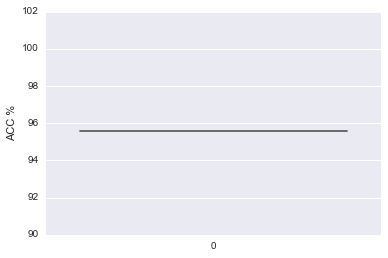

In [175]:
Nb = Adriel_NBClassifier()
Nb.learn(X_train, y_train)
pred_nb = Nb.predict(X_test)
desempenho_nb = accuracy_score(y_test, pred_nb) * 100

acc_nb = [desempenho_nb]*6
fig = plt.figure()
seaborn.violinplot(data=acc_nb, palette='Set2', split = True)
plt.ylabel('ACC %')
plt.show()

### 5.Testando com diferentes conjuntos de treinos/teste

Uma opção a se fazer é considerar utilizar diferentes amostras, sempre escolhidas randomicamente, para montarmos o nosso set de treino e teste. O resultados apresentados até aqui apresentavam diferentes versões do modelo variando seus parametros (KNN). Agora fixamos um modelo, mas geramos diferentes versões se pautando nos resultados obtidos utilizando as diferencias versões de treino e teste. Assim podemos ver o comportamento do modelo com recebimento de diferentes conjuntos de dados.

Aqui, a título de exemplo, vamos considerar 6 variações destes conjuntos.

In [176]:
acc_knn, acc_nb = [], []
auc_knn, auc_nb = [], []

for i in range(6):
    X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size = 0.30)

    Knn = Adriel_KnnClassifier(K = 5)
    Knn.learn(X_train,y_train)
    pred_knn = Knn.predict(X_test)
    acc_knn.append(accuracy_score(y_test, pred_knn)*100)
    fpr, tpr, thresholds = roc_curve(y_test, pred_knn, pos_label=2)
    auc_knn.append(auc(fpr, tpr)*100)
    desempenho_knn = [accuracy_score(y_test, pred_knn)*100, auc(fpr, tpr)*100]
 
    Nb = Adriel_NBClassifier()
    Nb.learn(X_train, y_train)
    pred_nb = Nb.predict(X_test)
    acc_nb.append(accuracy_score(y_test, pred_nb)*100)
    fpr, tpr, thresholds = roc_curve(y_test, pred_nb, pos_label=2)
    auc_nb.append(auc(fpr, tpr)*100)
    desempenho_nb = [accuracy_score(y_test, pred_nb) * 100, auc(fpr, tpr)*100]
 
    print("Randon Train/Teste[{}]".format(i))
    print("ACC e AUC KNN (respect.): ", desempenho_knn, "%")
    print("ACC e AUC NB (respect.):  ", desempenho_nb, "%\n")
    

Randon Train/Teste[0]
ACC e AUC KNN (respect.):  [97.777777777777771, 98.275862068965523] %
ACC e AUC NB (respect.):   [93.333333333333329, 95.689655172413794] %

Randon Train/Teste[1]
ACC e AUC KNN (respect.):  [93.333333333333329, 95.454545454545453] %
ACC e AUC NB (respect.):   [95.555555555555557, 95.580808080808083] %

Randon Train/Teste[2]
ACC e AUC KNN (respect.):  [95.555555555555557, 96.443965517241381] %
ACC e AUC NB (respect.):   [97.777777777777771, 98.168103448275872] %

Randon Train/Teste[3]
ACC e AUC KNN (respect.):  [97.777777777777771, 98.148148148148152] %
ACC e AUC NB (respect.):   [97.777777777777771, 98.662551440329224] %

Randon Train/Teste[4]
ACC e AUC KNN (respect.):  [95.555555555555557, 96.969696969696969] %
ACC e AUC NB (respect.):   [97.777777777777771, 98.484848484848484] %

Randon Train/Teste[5]
ACC e AUC KNN (respect.):  [93.333333333333329, 97.023809523809518] %
ACC e AUC NB (respect.):   [91.111111111111114, 94.94047619047619] %



Para melhorar a visualização, podemos colocar esses dados em uma tabela usando o Pandas.


In [177]:
result = pd.DataFrame({'KNN ACC': acc_knn, 'KNN AUC': auc_knn, 'NB ACC': acc_nb, 'NB AUC':auc_nb})
result


KNN ACC    KNN AUC     NB ACC     NB AUC
0  97.777778  98.275862  93.333333  95.689655
1  93.333333  95.454545  95.555556  95.580808
2  95.555556  96.443966  97.777778  98.168103
3  97.777778  98.148148  97.777778  98.662551
4  95.555556  96.969697  97.777778  98.484848
5  93.333333  97.023810  91.111111  94.940476

E também podemos analisar esta variação através de um gráfico com apresentando a média e o desvio padrão de cada variação

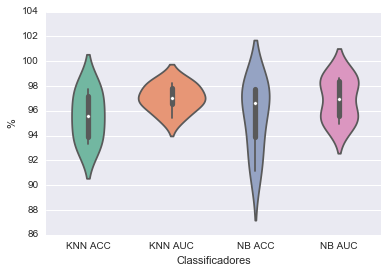

In [179]:
seaborn.violinplot(data=result, palette='Set2', split = True )
plt.ylabel('%'); plt.xlabel('Classificadores')
plt.show()


Esta última etapa se assemelha á *cross validation*, técnica que busca estimar o quão bom é um modelo diante de novos conjuntos de dados. Na literatura são encontradas diversas formas de realizar validação cruzada, as mais conheciadas são *K-fold, Holdout e Leave-one-out*. Há diversas bibliotecas com variações dessas implementações. O próprio SKlearn conta com estes métodos.

